## Ejercicio 1


In [1]:
# Importando librerias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generamos la matriz
A = np.matrix([[1, 2], [2, 3]])

# Calculamos la descomposicion
u, s, v = np.linalg.svd(A)

print("U")
print(u)

print("\nS")
print(s)

print("\nV")
print(v)

print("\nComprobacion")
print(np.dot(u, np.dot(np.diag(s), v)))

U
[[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]]

S
[4.23606798 0.23606798]

V
[[-0.52573111 -0.85065081]
 [ 0.85065081 -0.52573111]]

Comprobacion
[[1. 2.]
 [2. 3.]]


(100, 2)
(100, 2)


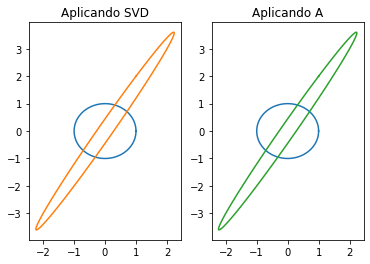

In [3]:
# generamos los valores de radio de nuestro circulo de radio 1
r=1.0
theta=np.linspace(0,2*np.pi,100)
x=r*np.cos(theta)
y=r*np.sin(theta)

# Creamos la matriz para facilitar los calculos
xy = np.matrix([x,y]).T

# Aplicamos V luego S y por ultimo U al conjunto de valores
prodSVD = np.dot(u,np.dot(np.diag(s),np.dot(v,xy.T))).T
print(prodSVD.shape)

# Aplicamos A al conjunto de valores
prod = np.dot(A,xy.T).T
print(prod.shape)

figure, axes = plt.subplots(1,2)
axes[0].set_title("Aplicando SVD")
axes[1].set_title("Aplicando A")
# Circulo radio 1
axes[0].plot(xy[:,0],xy[:,1])
axes[1].plot(xy[:,0],xy[:,1])

# Aplicando SVD
axes[0].plot(prodSVD[:,0],prodSVD[:,1],'tab:orange')

# Aplicando A
axes[1].plot(prod[:,0],prod[:,1],'tab:green')

# Obtenemos el mismo resultado al aplicar SVD que al aplicar A directamente sobre el conjunto de datos
plt.show()

#### Matriz rank 1

Por la información obtenida en clase tenemos que la matriz de rango k $$A_k := \sigma_1 u_1 v_1^T + ... + \sigma_k u_k v_k^T$$ es la que mejor aproxima a A con rango k

In [4]:
print('u1: ', u.A[0])
print('Σ1: ', s[0])
print('v1: ', v.A[0])

# Calculamos la matriz
Matriz = u.A[0] * v.A[0] * s[0]
Matriz

u1:  [-0.52573111 -0.85065081]
Σ1:  4.236067977499789
v1:  [-0.52573111 -0.85065081]


array([1.17082039, 3.06524758])

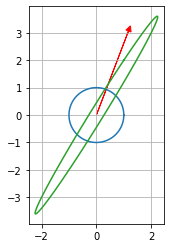

In [5]:
fig, ax = plt.subplots(1)
ax.plot(xy[:,0],xy[:,1])
ax.plot(prodSVD[:,0],prodSVD[:,1],'tab:green')
ax.arrow(0, 0, Matriz[0], Matriz[1], head_width=0.2, head_length=0.2,fc='red',  ec='red')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_aspect(1)
plt.show()